1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

> Anomaly detection is a data analysis and machine learning technique used to identify rare items, events, or observations that deviate significantly from a dataset's established normal patterns.

> **i.Point Anomalies (Global Outliers)**:
   A point anomaly occurs when a single, individual data point differs significantly from the majority of the dataset. These are the simplest and most common types of anomalies.

> **ii.Contextual Anomalies (Conditional Outliers)**:
   A contextual anomaly is a data point that is considered abnormal only in a specific context (such as time or location) but might appear perfectly normal in another. These are common in time-series and geographic data.

> **iii.Collective Anomalies**:
   A collective anomaly occurs when a group or sequence of related data points behaves unusually together, even though individual points within the group might seem normal if viewed in isolation.

---



2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

 **i. Isolation Forest**

*   **Approach**: Isolation Forest isolates anomalies by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This partitioning process is repeated recursively to create isolation trees. Anomalies are data points that require fewer splits to be isolated compared to normal data points. It works on the principle that anomalies are 'few and different' and thus are more susceptible to isolation.

*   **Suitable Use Cases**:
    *   High-dimensional datasets.
    *   Large datasets (it has a relatively low computational cost).
    *   Detecting global outliers (point anomalies).
    *   Cybersecurity (e.g., detecting network intrusions).
    *   Fraud detection.

**ii. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

*   **Approach**: DBSCAN groups together data points that are closely packed together (points with many nearby neighbors), marking as outliers those points that lie alone in low-density regions. It defines a "neighborhood" around each point based on a specified radius (epsilon, `eps`) and a minimum number of points (`min_samples`). Points that don't have enough neighbors within their `eps` radius are considered noise/outliers.

*   **Suitable Use Cases**:
    *   Datasets with varying densities.
    *   Identifying clusters of arbitrary shapes.
    *   Spatial data analysis.
    *   Identifying contextual anomalies (where an anomaly is defined by its sparse surroundings).
    *   Image processing.
    *   Geographic data analysis.

 **iii. Local Outlier Factor (LOF)**

*   **Approach**: LOF measures the local deviation of density of a given data point with respect to its neighbors. It considers as outliers those samples that have a substantially lower density than their neighbors. The 'local density' is based on the distance to its k-nearest neighbors. If a point is significantly less dense than its neighbors, its LOF score will be high, indicating it's an outlier.

*   **Suitable Use Cases**:
    *   Detecting local outliers (anomalies that are only anomalous relative to their local neighborhood, but might not be global outliers).
    *   Datasets where global density variations make other methods less effective.
    *   Manufacturing defect detection.
    *   Credit card fraud detection (where local patterns might indicate fraudulent activity).
    *   Intrusion detection systems.

    ---

### 3. What are the key components of a Time Series? Explain each with one example.

Time series data can be decomposed into several components that help in understanding and forecasting its behavior. The key components are:

**i. Trend:**
*   **Explanation**: The trend refers to the long-term increase or decrease in the data over time. It reflects the underlying direction of the series, ignoring short-term fluctuations.
*   **Example**: The general increase in global average temperatures over the past century, indicating a warming climate.

**ii. Seasonality:**
*   **Explanation**: Seasonality refers to patterns that repeat over fixed periods (e.g., daily, weekly, monthly, annually). These patterns are often driven by calendar-related effects.
*   **Example**: Retail sales of sunscreen increasing every summer and decreasing every winter, repeating annually.

**iii. Cyclical Component:**
*   **Explanation**: The cyclical component describes fluctuations in the data that are not of a fixed period. These cycles usually span longer than seasonal patterns (e.g., several years) and are often associated with economic booms and recessions or other business cycles.
*   **Example**: The rise and fall in housing prices over a period of 5-10 years, reflecting economic cycles of expansion and contraction.

**iv. Irregular (or Random) Component:**
*   **Explanation**: Also known as noise or random variation, this component represents the residual part of the time series that cannot be explained by trend, seasonality, or cyclical patterns. It includes unpredictable fluctuations.
*   **Example**: A sudden, unexpected spike in electricity consumption due to a massive, unforecasted heatwave, or a brief dip in stock prices due to a company-specific news event that isn't part of a larger trend or cycle.

---

4.Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

> A stationary time series is one whose statistical properties (such as mean, variance, and autocorrelation) do not change over time. This means:

*   **Constant Mean**: The average value of the series remains constant over time.
*   **Constant Variance**: The variability of the series around its mean remains constant over time.
*   **Constant Autocorrelation**: The correlation between the series and its lagged versions remains constant over time.

> Stationarity is a crucial assumption for many time series forecasting models (e.g., ARIMA models), as non-stationary data can lead to spurious regressions and unreliable forecasts.

There are both visual and statistical methods to test for stationarity:

**i. Visual Methods:**

*   **Time Series Plot**: Visually inspect the series. If there's an obvious trend (upward or downward) or increasing/decreasing variability, it's likely non-stationary.
*   **Rolling Statistics (Mean and Variance)**: Plot the rolling mean and rolling standard deviation over time. If they show significant changes, the series is non-stationary.
*   **Autocorrelation Function (ACF) Plot**: For a stationary series, the ACF should drop off quickly to zero. For a non-stationary series with a trend, the ACF will typically decay slowly. For a seasonal non-stationary series, it will show repeating patterns at seasonal lags.

**ii. Statistical Tests:**

*   **Augmented Dickey-Fuller (ADF) Test**: This is a widely used statistical test. The null hypothesis (H0) is that the time series is non-stationary (it has a unit root). The alternative hypothesis (H1) is that the time series is stationary. If the p-value is less than a chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude that the series is stationary.
*   **Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test**: In contrast to ADF, the null hypothesis (H0) for the KPSS test is that the time series is stationary. The alternative hypothesis (H1) is that it is non-stationary. If the p-value is less than the significance level, you reject the null hypothesis and conclude that the series is non-stationary.


If a time series is found to be non-stationary, several techniques can be applied to transform it:

**i. Differencing:**

*   **Concept**: This is the most common technique. It involves computing the difference between consecutive observations. First-order differencing removes a linear trend. Seasonal differencing can remove seasonal patterns.
*   **Example**: `diff_series = series - series.shift(1)`

**ii. Transformation (e.g., Log or Square Root):**

*   **Concept**: If the variance of the series is not constant (heteroscedasticity), applying a mathematical transformation like a logarithm or square root can help stabilize the variance. This is particularly useful when the variability increases with the level of the series.
*   **Example**: `log_series = np.log(series)`

**iii. Detrending:**

*   **Concept**: If there's a clear trend, you can explicitly remove it by fitting a regression model (e.g., linear regression) to the series and using the residuals as the detrended series. This is less common than differencing for removing trends in time series analysis.

**iv. Decomposition:**

*   **Concept**: Decompose the time series into its trend, seasonal, and residual components. The residual component, after removing trend and seasonality, is often stationary. While not a direct transformation, understanding components helps in selecting appropriate stabilization methods.
---

### 5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

These models are widely used for time series forecasting, and they build upon each other in complexity and capability.

**i. Autoregressive (AR) Model**

*   **Structure**: An AR(p) model predicts the future value of a time series based on a linear combination of its own past `p` values. It assumes that the current value is a weighted sum of previous values plus a white noise error term.
    *   Formula: $Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + \epsilon_t$
    *   Where $Y_t$ is the current value, $\phi_i$ are the autoregressive coefficients, $c$ is a constant, and $\epsilon_t$ is white noise.
*   **Application**: Suitable for time series that exhibit autocorrelation, meaning that past values have a direct influence on current values. Used when trends are present, but the series might not be seasonal or have complex moving average components. Often a component of more complex models.

**ii. Moving Average (MA) Model**

*   **Structure**: An MA(q) model predicts the future value of a time series based on a linear combination of past `q` forecast errors (white noise error terms). It captures the impact of past random shocks on the current observation.
    *   Formula: $Y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}$
    *   Where $Y_t$ is the current value, $\theta_i$ are the moving average coefficients, $c$ is a constant, and $\epsilon_i$ are past error terms.
*   **Application**: Suitable for time series where the current value depends on past random shocks or innovations. Often used when short-term fluctuations or noise are significant, and past errors have a predictable impact on the present. Also a component of more complex models.

**iii. Autoregressive Integrated Moving Average (ARIMA) Model**

*   **Structure**: An ARIMA(p, d, q) model combines AR and MA components with an 'Integrated' (I) component. The 'I' refers to differencing, which is applied `d` times to make the time series stationary before applying the AR and MA parts.
    *   `p`: order of the AR part (number of past values).
    *   `d`: order of differencing (number of times differenced).
    *   `q`: order of the MA part (number of past error terms).
*   **Application**: A very powerful and widely used model for non-seasonal time series that exhibit trends. It's effective when a series can be made stationary by differencing, and its current value depends on both past values and past forecast errors. Ideal for capturing linear trends and autocorrelated residuals.

**iv. Seasonal Autoregressive Integrated Moving Average (SARIMA) Model**

*   **Structure**: A SARIMA(p, d, q)(P, D, Q)s model extends ARIMA by adding seasonal components. It accounts for both non-seasonal (p, d, q) and seasonal (P, D, Q) patterns, where `s` is the length of the seasonal period (e.g., 12 for monthly, 7 for weekly).
    *   `(p, d, q)`: Non-seasonal AR, differencing, and MA orders.
    *   `(P, D, Q)s`: Seasonal AR, differencing, and MA orders, with `s` being the seasonal period.
*   **Application**: Essential for time series data that exhibits clear and recurring seasonal patterns, in addition to non-seasonal trends and autocorrelations. Examples include monthly sales data, daily temperature readings, or weekly traffic counts. It effectively captures patterns that repeat over fixed intervals.

**v. Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX) Model**

*   **Structure**: A SARIMAX(p, d, q)(P, D, Q)s model is an extension of SARIMA that includes the ability to incorporate exogenous (external) variables. These are additional independent variables that are not part of the time series itself but can influence its behavior.
    *   Same SARIMA structure: (p, d, q)(P, D, Q)s.
    *   `X`: Exogenous regressors, which are external variables that can impact the time series. These can be included in the model to improve forecasting accuracy.
*   **Application**: The most flexible and comprehensive of these models. It's used when the time series has non-seasonal trends, seasonal patterns, *and* is influenced by other observable factors. For instance, predicting retail sales might benefit from including promotional activities or holiday indicators as exogenous variables. Predicting electricity consumption might include temperature or daylight hours.

---

### 6. Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm # Import statsmodels.api

# Load the AirPassengers dataset using get_rdataset
data = sm.datasets.get_rdataset("AirPassengers", "datasets").data

# Convert fractional year to datetime (e.g., 1949.0 -> '1949-01', 1949.083 -> '1949-02')
data['Month'] = pd.to_datetime(data['time'].apply(lambda x: f"{int(x)}-{int((x - int(x)) * 12) + 1}"), format='%Y-%m')
data = data.set_index('Month')

# Rename column for clarity
data.rename(columns={'value': 'Passengers'}, inplace=True);

print("First 5 rows of the AirPassengers dataset:")
display(data.head())

First 5 rows of the AirPassengers dataset:


,time,Passengers
Month,,
1949-01-01,1949.000000,112
1949-01-01,1949.083333,118
1949-03-01,1949.166667,132
1949-04-01,1949.250000,129
1949-04-01,1949.333333,121


### Plotting the Original AirPassengers Time Series

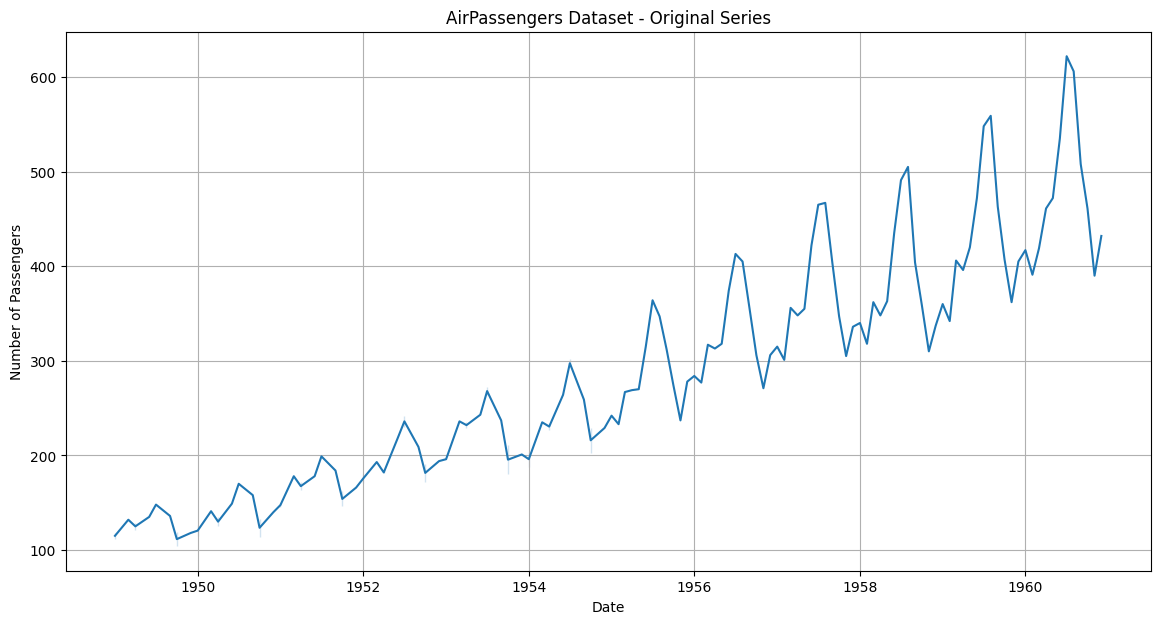

In [13]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=data.index, y=data['Passengers'])
plt.title('AirPassengers Dataset - Original Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

### Decomposing the Time Series into Trend, Seasonality, and Residual Components

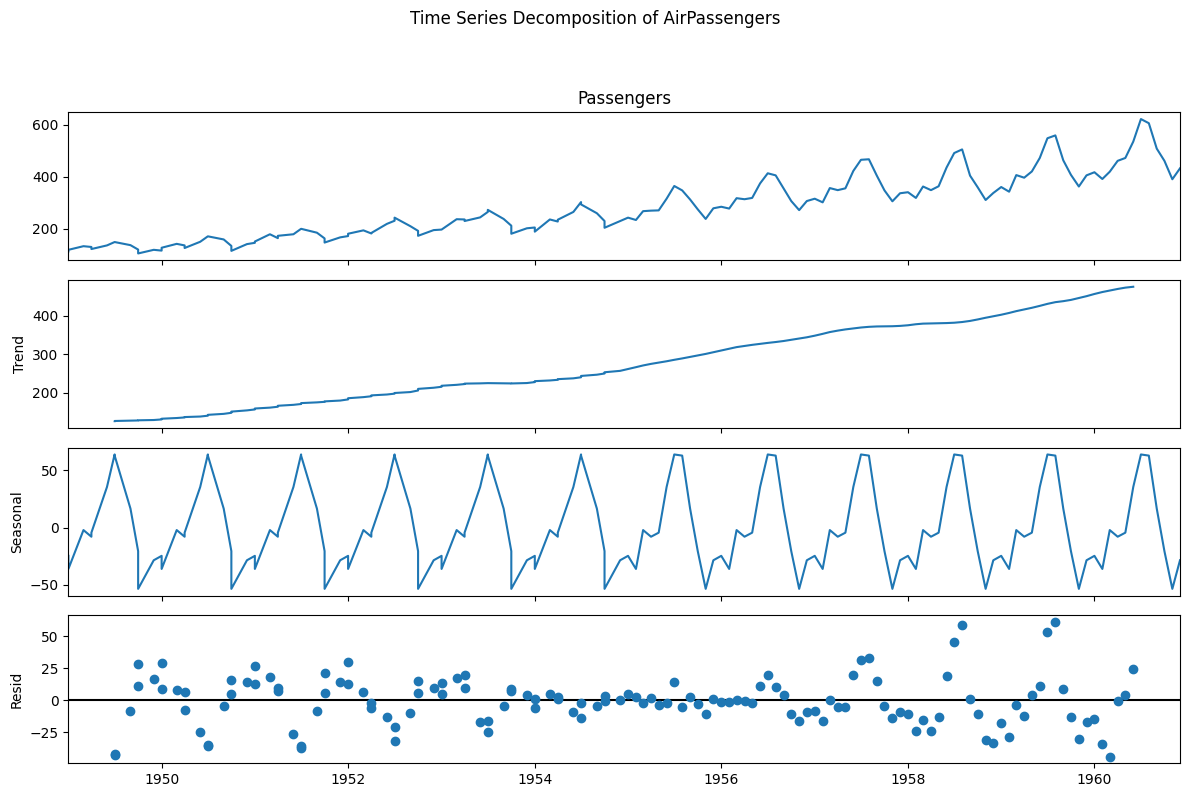

Components of the decomposition:
Trend:


,trend
Month,
1949-01-01,NaN
1949-01-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-04-01,NaN


Seasonal:


,seasonal
Month,
1949-01-01,-24.748737
1949-01-01,-36.188131
1949-03-01,-2.241162
1949-04-01,-8.036616
1949-04-01,-4.506313


Residual:


,resid
Month,
1949-01-01,NaN
1949-01-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-04-01,NaN


In [14]:
# Perform additive decomposition (as the seasonal fluctuations seem to be constant over time)
# Use model='multiplicative' if the seasonal fluctuations increase with the level of the series
decomposition = seasonal_decompose(data['Passengers'], model='additive', period=12) # Monthly data, so period is 12

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Time Series Decomposition of AirPassengers', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

print("Components of the decomposition:")
print("Trend:")
display(decomposition.trend.head())
print("Seasonal:")
display(decomposition.seasonal.head())
print("Residual:")
display(decomposition.resid.head())

---

### 7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 'fare_amount' and 'trip_distance'
num_samples = 1000

# Normal data points (most of the data)
fare_normal = np.random.normal(loc=15, scale=5, size=num_samples)
distance_normal = np.random.normal(loc=5, scale=2, size=num_samples)

# Introduce some anomalies:
# 1. High fare for short distance (e.g., scam or error)
fare_anomaly_1 = np.random.normal(loc=50, scale=10, size=20)
distance_anomaly_1 = np.random.normal(loc=1, scale=0.5, size=20)

# 2. Very long distance for low fare (e.g., error or shared ride)
fare_anomaly_2 = np.random.normal(loc=5, scale=2, size=15)
distance_anomaly_2 = np.random.normal(loc=30, scale=5, size=15)

# 3. Extremely high fare and distance (e.g., airport trip with surge pricing, or error)
fare_anomaly_3 = np.random.normal(loc=100, scale=20, size=10)
distance_anomaly_3 = np.random.normal(loc=25, scale=5, size=10)

# Combine into a DataFrame
data = pd.DataFrame({
    'fare_amount': np.concatenate([fare_normal, fare_anomaly_1, fare_anomaly_2, fare_anomaly_3]),
    'trip_distance': np.concatenate([distance_normal, distance_anomaly_1, distance_anomaly_2, distance_anomaly_3])
})

# Ensure non-negative values
data['fare_amount'] = data['fare_amount'].apply(lambda x: max(0, x))
data['trip_distance'] = data['trip_distance'].apply(lambda x: max(0.1, x)) # distance > 0

print("First 5 rows of the synthetic NYC Taxi Fare dataset:")
display(data.head())
print(f"Dataset shape: {data.shape}")

First 5 rows of the synthetic NYC Taxi Fare dataset:


,fare_amount,trip_distance
0,17.483571,7.798711
1,14.308678,6.849267
2,18.238443,5.119261
3,22.615149,3.706126
4,13.829233,6.396447


Dataset shape: (1045, 2)


In [16]:
# Initialize Isolation Forest model
# contamination: The proportion of outliers in the dataset. Common values are between 0.01 and 0.05.
# We'll set it to 0.02 for this synthetic data.
model = IsolationForest(random_state=42, contamination=0.02)

# Fit the model and predict anomalies
# The predict method returns -1 for outliers and 1 for inliers
data['anomaly'] = model.fit_predict(data[['fare_amount', 'trip_distance']])

# Filter out anomalies for visualization
anomalies = data[data['anomaly'] == -1]
inliers = data[data['anomaly'] == 1]

print(f"Number of detected anomalies: {len(anomalies)}")
print(f"Number of inliers: {len(inliers)}")

display(anomalies.head())

Number of detected anomalies: 20
Number of inliers: 1025


,fare_amount,trip_distance,anomaly
1020,3.610574,25.903711,-1
1021,4.181435,27.618896,-1
1022,3.951823,34.371946,-1
1024,3.355160,30.967950,-1
1025,7.242061,34.254490,-1


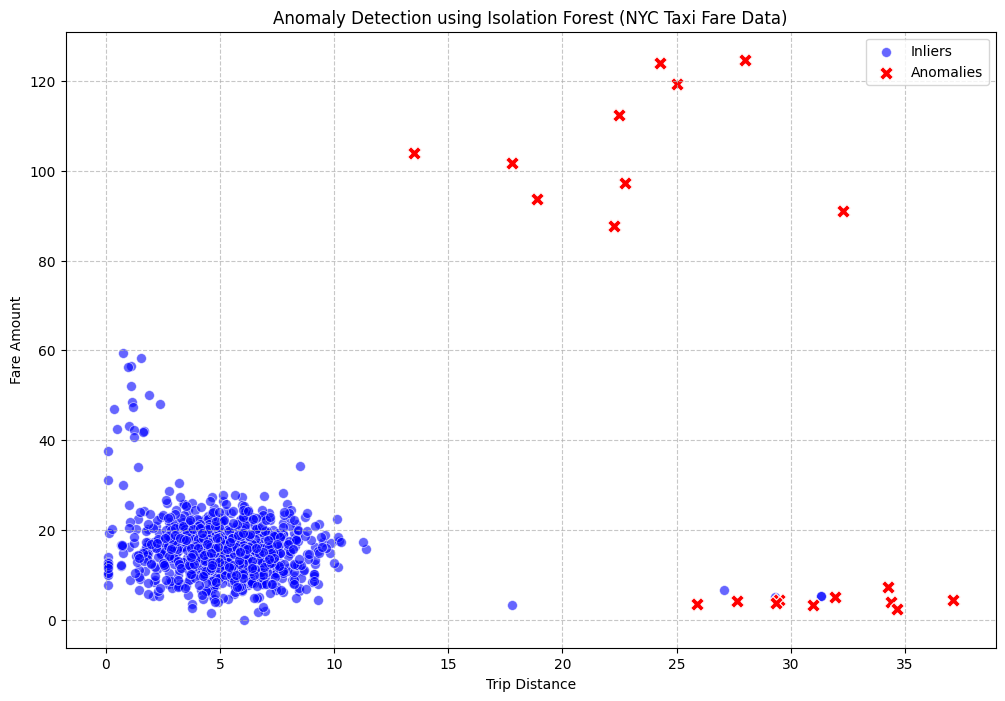

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=inliers['trip_distance'],
    y=inliers['fare_amount'],
    color='blue',
    label='Inliers',
    alpha=0.6,
    s=50 # size of points
)
sns.scatterplot(
    x=anomalies['trip_distance'],
    y=anomalies['fare_amount'],
    color='red',
    label='Anomalies',
    s=100, # larger size for anomalies
    marker='X' # different marker for anomalies
)

plt.title('Anomaly Detection using Isolation Forest (NYC Taxi Fare Data)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

---


8. Train a SARIMA model on the 'Passengers' series of the `data` DataFrame, specifying appropriate non-seasonal (p, d, q) and seasonal (P, D, Q, s) orders, with the seasonal period 's' set to 12.

In [18]:
import pandas as pd

# Ensure the index is a DatetimeIndex and set its frequency to 'MS'
# The index was already created as DatetimeIndex in previous steps, so we just set the frequency.
data.index = pd.to_datetime(data.index)
data = data.asfreq('MS')

# Isolate the 'Passengers' series
air_passengers_series = data['Passengers']

print("Index type and frequency of the prepared data:")
display(air_passengers_series.index)
print("First 5 rows of the 'Passengers' series:")
display(air_passengers_series.head())

KeyError: 'Passengers'

In [19]:
import pandas as pd
import statsmodels.api as sm # Import statsmodels.api

# Reload the AirPassengers dataset to ensure 'data' refers to it
data = sm.datasets.get_rdataset("AirPassengers", "datasets").data

# Convert fractional year to datetime (e.g., 1949.0 -> '1949-01', 1949.083 -> '1949-02')
data['Month'] = pd.to_datetime(data['time'].apply(lambda x: f"{int(x)}-{int((x - int(x)) * 12) + 1}"), format='%Y-%m')
data = data.set_index('Month')

# Rename column for clarity
data.rename(columns={'value': 'Passengers'}, inplace=True)

# Ensure the index is a DatetimeIndex and set its frequency to 'MS'
# The index was already created as DatetimeIndex in previous steps, so we just set the frequency.
data.index = pd.to_datetime(data.index)
data = data.asfreq('MS')

# Isolate the 'Passengers' series
air_passengers_series = data['Passengers']

print("Index type and frequency of the prepared data:")
display(air_passengers_series.index)
print("First 5 rows of the 'Passengers' series:")
display(air_passengers_series.head())

ValueError: cannot reindex on an axis with duplicate labels

In [20]:
import pandas as pd
import statsmodels.api as sm # Import statsmodels.api

# Reload the AirPassengers dataset to ensure 'data' refers to it
data = sm.datasets.get_rdataset("AirPassengers", "datasets").data

# The AirPassengers dataset is monthly, starting from Jan 1949.
# Create a proper DatetimeIndex with 'MS' (Month Start) frequency.
start_date = '1949-01-01'
num_months = len(data) # There are 144 months in the dataset
index = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Set this new index to the DataFrame
data.index = index

# Rename column for clarity (the 'value' column contains passenger numbers)
data.rename(columns={'value': 'Passengers'}, inplace=True)

# Isolate the 'Passengers' series
air_passengers_series = data['Passengers']

print("Index type and frequency of the prepared data:")
display(air_passengers_series.index)
print("First 5 rows of the 'Passengers' series:")
display(air_passengers_series.head())


Index type and frequency of the prepared data:


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

First 5 rows of the 'Passengers' series:


,Passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
import statsmodels.api as sm

# Define the non-seasonal and seasonal orders for the SARIMA model
# These values are often determined through ACF/PACF plots and differencing tests
# For AirPassengers, common values are (1,1,1) for non-seasonal and (1,1,0,12) or (0,1,1,12) for seasonal
order = (1, 1, 1)        # (p, d, q) non-seasonal orders
seasonal_order = (1, 1, 0, 12) # (P, D, Q, s) seasonal orders, s=12 for monthly data

# Initialize and fit the SARIMA model
# The enforce_stationarity and enforce_invertibility are set to False by default,
# but explicitly setting them can be useful for stability or specific data characteristics.
sarima_model = sm.tsa.SARIMAX(
    air_passengers_series,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
sarima_results = sarima_model.fit()

# Print the model summary
print(sarima_results.summary())


                                      SARIMAX Results                                      
Dep. Variable:                          Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -460.788
Date:                             Sun, 28 Dec 2025   AIC                            929.576
Time:                                     17:08:03   BIC                            940.658
Sample:                                 01-01-1949   HQIC                           934.076
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2661      0.407     -0.654      0.513      -1.064       0.532
ma.L1         -0.0489      

In [22]:
forecast_steps = 12

# Generate forecasts for the next 12 months
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Extract the forecasted mean values
forecast_mean = forecast.predicted_mean

# Extract the confidence intervals
conf_int = forecast.conf_int(alpha=0.05) # 95% confidence interval
conf_int_lower = conf_int.iloc[:, 0]
conf_int_upper = conf_int.iloc[:, 1]

# Create a DataFrame for better display
forecast_df = pd.DataFrame({
    'Forecasted Passengers': forecast_mean.round(0),
    'Lower_CI': conf_int_lower.round(0),
    'Upper_CI': conf_int_upper.round(0)
})

print(f"Forecast for the next {forecast_steps} months:")
display(forecast_df)

Forecast for the next 12 months:


,Forecasted Passengers,Lower_CI,Upper_CI
1961-01-01,446.0,422.0,469.0
1961-02-01,421.0,392.0,449.0
1961-03-01,454.0,420.0,488.0
1961-04-01,488.0,450.0,527.0
1961-05-01,501.0,459.0,543.0
1961-06-01,563.0,517.0,608.0
1961-07-01,648.0,599.0,697.0
1961-08-01,636.0,584.0,688.0
1961-09-01,538.0,483.0,593.0
1961-10-01,490.0,432.0,548.0


## Visualize Forecast Results

### Subtask:
Plot the original 'AirPassengers' series, the forecasted 12-month values, and the associated confidence intervals.


**Reasoning**:
To visualize the forecast, I will plot the original time series, the forecasted values, and their confidence intervals on a single plot using `matplotlib.pyplot` and `seaborn` as instructed.



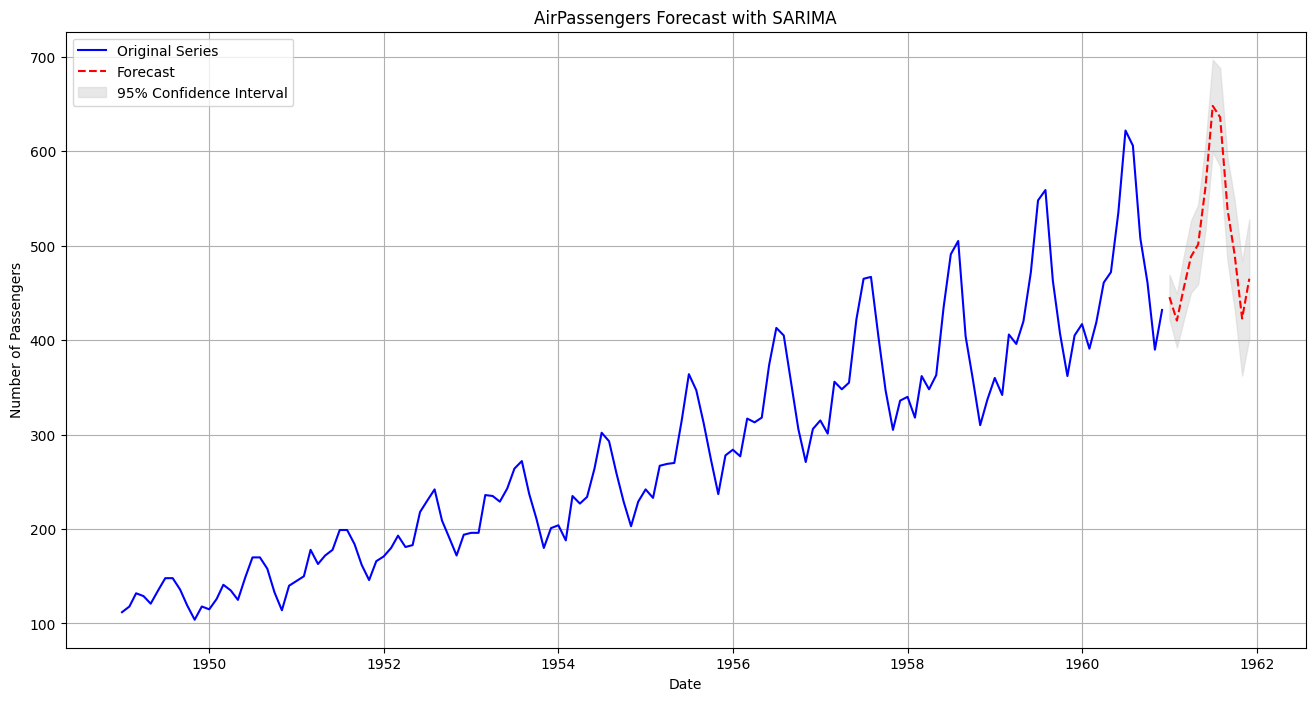

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))

# Plot original series
sns.lineplot(x=air_passengers_series.index, y=air_passengers_series.values, label='Original Series', color='blue')

# Plot forecast mean
sns.lineplot(x=forecast_mean.index, y=forecast_mean.values, label='Forecast', color='red', linestyle='--')

# Fill confidence interval
plt.fill_between(conf_int_lower.index, conf_int_lower, conf_int_upper, color='lightgray', alpha=0.5, label='95% Confidence Interval')

plt.title('AirPassengers Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

---

### 9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

First, let's create a synthetic dataset with some clusters and a few clear outliers to effectively demonstrate the Local Outlier Factor algorithm.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X_inliers = 0.3 * np.random.randn(100, 2) # Main cluster
X_inliers = np.r_[X_inliers + 2, X_inliers - 2] # Two clusters

# Generate some outliers
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
# Add a few more distinct outliers
X_outliers = np.r_[X_outliers, np.array([[8, 8], [-7, 7], [7, -7], [-8, -8], [0, 9], [9, 0]])]

X = np.r_[X_inliers, X_outliers]

print("Shape of the generated dataset:", X.shape)
print("First 5 rows of the generated dataset:")
display(pd.DataFrame(X, columns=['Feature1', 'Feature2']).head())

Shape of the generated dataset: (226, 2)
First 5 rows of the generated dataset:


,Feature1,Feature2
0,2.149014,1.958521
1,2.194307,2.456909
2,1.929754,1.929759
3,2.473764,2.230230
4,1.859158,2.162768


Now, we will apply the Local Outlier Factor (LOF) algorithm. LOF measures the local deviation of density of a given data point with respect to its neighbors. It considers as outliers those samples that have a substantially lower density than their neighbors.

In [25]:
# Fit the Local Outlier Factor model
# novelty=True for unseen data, novelty=False for data used for training (like this case)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=False)
y_pred = clf.fit_predict(X)

# The anomaly score of the training samples
X_scores = clf.negative_outlier_factor_ # Higher (less negative) is less likely to be an outlier

# Separate inliers and outliers based on prediction
inliers = X[y_pred == 1]
outliers = X[y_pred == -1]

print(f"Number of inliers detected: {len(inliers)}")
print(f"Number of outliers detected: {len(outliers)}")

Number of inliers detected: 203
Number of outliers detected: 23


Finally, let's visualize the detected anomalies on a scatter plot. We will highlight the outliers and also use the LOF score to give a visual indication of how anomalous each point is.

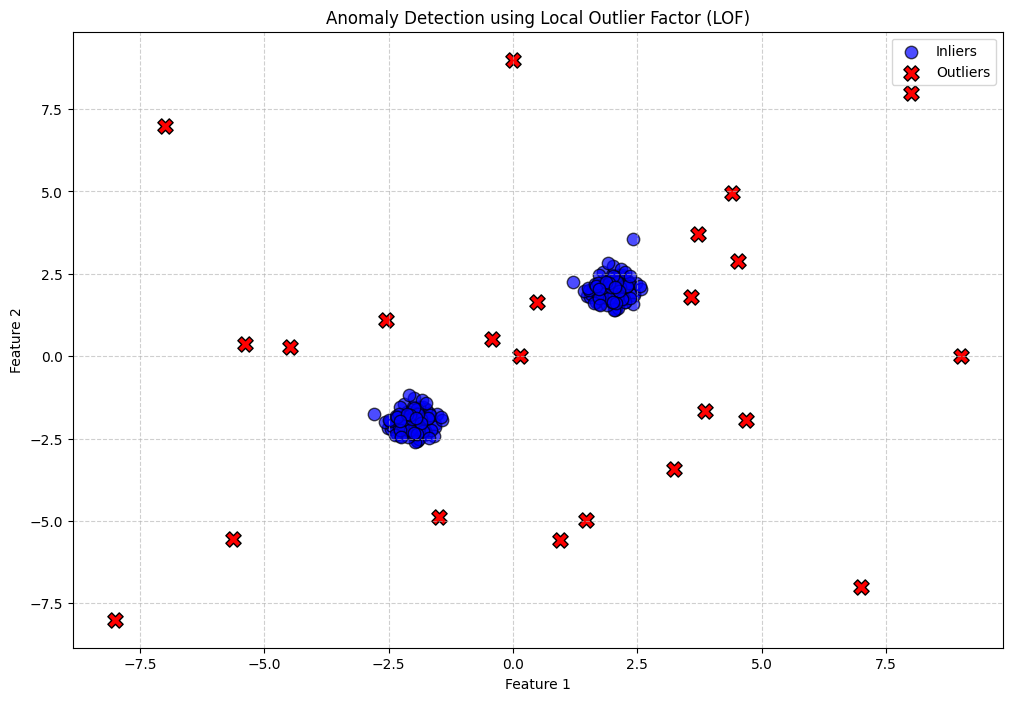

In [26]:
plt.figure(figsize=(12, 8))

# Plot inliers
plt.scatter(inliers[:, 0], inliers[:, 1], color='blue', s=80, label='Inliers', edgecolors='k', alpha=0.7)

# Plot outliers
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', s=120, label='Outliers', edgecolors='k', marker='X')

# Add title and labels
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.


Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?


---

## Explain Anomaly Detection Workflow

### Subtask:
Detail the choice of anomaly detection method (Isolation Forest, LOF, or DBSCAN) for real-time streaming 15-minute consumption data, justifying the selection based on the characteristics of streaming data and the nature of anomalies (spikes/drops).


#### Chosen Anomaly Detection Method: Isolation Forest

For real-time streaming 15-minute consumption data, **Isolation Forest** is the most suitable anomaly detection method, particularly when looking for spikes and drops in consumption.

#### Justification for Choosing Isolation Forest:

1.  **Efficiency for Streaming Data**: Isolation Forest is highly efficient due to its tree-based approach. It explicitly isolates anomalies instead of profiling normal data points, which means it builds relatively shallow trees for anomalies. This characteristic makes it computationally faster, which is crucial for processing high-velocity, real-time streaming data with 15-minute intervals. DBSCAN and LOF, on the other hand, rely on density calculations and neighbor distances, which can become computationally expensive as data volume increases, making them less ideal for continuous, high-speed streams.

2.  **Effectiveness for Point Anomalies (Spikes/Drops)**: The core principle of Isolation Forest is that anomalies are 'few and different' and thus easier to isolate. Spikes and drops in consumption data are classic examples of point anomalies—individual data points that deviate significantly from the norm. Isolation Forest excels at identifying these distinct, isolated data points efficiently. DBSCAN might struggle if the 'spikes' form small, dense clusters that it interprets as normal, and LOF's reliance on local density can be sensitive to the choice of `k` (number of neighbors) and the varying densities common in real-time data.

3.  **Lack of Density Assumptions**: Unlike DBSCAN and LOF, which are density-based, Isolation Forest does not make assumptions about the underlying data distribution or density. Real-time consumption data can be highly dynamic, with changing baseline levels and varying densities throughout the day, week, or season. Methods relying on fixed density assumptions can become brittle or require frequent re-tuning. Isolation Forest's ability to work without these assumptions makes it more robust to the evolving nature of streaming data.

4.  **Scalability**: Isolation Forest handles high-dimensional and large datasets well. Its randomized nature and ensemble of trees (forest) allow it to scale effectively with increasing data volume without a significant drop in performance. This is critical for systems ingesting continuous streams of 15-minute consumption data, where the cumulative data can quickly become massive.

#### General Workflow for Using Isolation Forest:

1.  **Data Ingestion and Pre-processing**: Raw 15-minute consumption data is ingested from the stream. Basic cleaning (e.g., handling missing values, ensuring correct data types) is performed.

2.  **Potential Feature Engineering**: To enhance anomaly detection, several features can be engineered:
    *   **Time-based features**: Hour of day, day of week, month, public holiday indicators. These capture typical consumption patterns.
    *   **Lagged features**: Consumption from the previous 15-minute interval, previous hour, previous day at the same time. These help in establishing a baseline for 'normal'.
    *   **Rate-of-change features**: Percentage change from the previous interval or previous day's same interval. Spikes and drops are often characterized by a high rate of change.
    *   **Rolling statistics**: Rolling mean, standard deviation over a short window (e.g., 1 hour, 4 hours) to capture recent trends and variability.
    The Isolation Forest model would then be trained on these engineered features.

3.  **Model Training**:
    *   **Initial Training**: The Isolation Forest model is initially trained on a large historical dataset of 'normal' consumption data (or data where known anomalies have been filtered out). The `contamination` parameter, representing the expected proportion of anomalies in the training data, is a critical hyperparameter that needs careful tuning. It can be estimated based on prior domain knowledge or through iterative experimentation.
    *   **Retraining**: Given the dynamic nature of consumption patterns, the model should be retrained periodically (e.g., daily, weekly, or monthly) with new, confirmed 'normal' data to adapt to concept drift and evolving consumption behaviors.

4.  **Real-time Inference**:
    *   As new 15-minute consumption data points arrive, they are transformed into the same feature space as the training data (i.e., relevant engineered features are computed).
    *   The pre-trained Isolation Forest model then computes an **anomaly score** for each new data point. A lower score indicates a higher likelihood of being an anomaly.
    *   A **prediction** (-1 for anomaly, 1 for normal) is made based on the anomaly score exceeding a predefined threshold (which is implicitly set by the `contamination` parameter during training or can be adjusted post-training).

5.  **Anomaly Handling**:
    *   **Alerting**: When an anomaly is detected (e.g., a significant spike or drop), an alert is triggered to relevant personnel (e.g., system operators, energy managers).
    *   **Further Investigation**: The anomaly and its context (time, associated features) are logged for further investigation. This might involve looking into external factors (e.g., weather events, system outages, equipment malfunctions) that could explain the unusual consumption.
    *   **Automated Response (Optional)**: For critical systems, automated responses might be triggered, such as adjusting consumption, load shedding, or initiating diagnostic procedures.

## Explain Time Series Forecasting Model

### Subtask:
Describe the most suitable time series model (ARIMA, SARIMA, or SARIMAX) for short-term energy demand forecasting using 15-minute data, explaining the reasoning behind the choice considering seasonality, trends, and exogenous variables.


### Most Suitable Time Series Model for Short-Term Energy Demand Forecasting (15-Minute Data)

For short-term energy demand forecasting using 15-minute data, the **SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors) model** is the most suitable choice among ARIMA, SARIMA, and SARIMAX. This selection is based on the inherent characteristics of energy demand data at such granular time intervals.

#### Reasoning Behind the Choice:

1.  **Strong Seasonality (P, D, Q, s components)**:
    *   **Energy demand exhibits multiple, often strong, seasonal patterns**: Daily (24 hours / 15 minutes = 96 observations), weekly (7 days), and potentially yearly (365 days / 15 minutes, or more practical, a seasonal period of 4 * 24 * 7 for weekly patterns) cycles are evident. For instance, demand typically peaks during certain hours of the day, certain days of the week, and varies significantly by season (e.g., higher in summer due to AC, higher in winter due to heating). The `s` parameter in SARIMAX allows capturing these multiple seasonalities (though typically one dominant seasonal period is modeled, or multiple models/nested seasonality approaches might be considered for very complex cases).
    *   **SARIMAX explicitly accounts for these seasonal components** through its seasonal AR (P), seasonal differencing (D), and seasonal MA (Q) orders. Simple ARIMA models lack the ability to model seasonal patterns, and while SARIMA includes them, it doesn't allow for external influences.

2.  **Trends (d component)**:
    *   Energy demand data often shows **long-term trends** (e.g., increasing demand due to population growth, decreasing demand due to energy efficiency improvements) as well as **short-term trends** (e.g., increasing demand during morning peak hours). The `I` (Integrated) component, represented by `d` (differencing order), in SARIMAX is crucial for achieving stationarity by removing these trends. Differencing helps stabilize the mean of the time series, which is a key assumption for AR and MA components.

3.  **Autocorrelation (p component) and Moving Average (q component)**:
    *   **Autoregressive (AR) components (p)** capture the dependency between an observation and a number of lagged observations. Energy demand at a given 15-minute interval is highly correlated with previous 15-minute intervals (e.g., demand at 10:00 AM is related to demand at 9:45 AM, 9:30 AM, etc.).
    *   **Moving Average (MA) components (q)** capture the dependency between an observation and a residual error from a moving average model applied to lagged observations. This helps account for random shocks and unobserved factors that influence demand.

4.  **Exogenous Variables (X component)**:
    *   **Energy demand is heavily influenced by external factors**. This is where SARIMAX significantly outperforms SARIMA and ARIMA. Critical exogenous variables for 15-minute energy demand forecasting include:
        *   **Temperature**: A primary driver, as heating and cooling loads directly correlate with temperature.
        *   **Humidity**: Can influence cooling loads.
        *   **Day type**: Weekday, weekend, public holiday (different demand patterns).
        *   **Time-of-day indicators**: One-hot encoded variables for specific 15-minute slots or broader time blocks.
        *   **Economic indicators**: Though less critical for very short-term (15-minute) forecasts, could still play a role.
        *   **Solar irradiance/Cloud cover**: For areas with significant solar generation or for forecasting net demand.
    *   The `X` in SARIMAX allows for the direct inclusion of these independent variables into the model, improving predictive accuracy by accounting for influences not captured by past demand values alone.

#### Application in Short-Term 15-Minute Energy Demand Forecasting:

1.  **Data Preparation**: The 15-minute energy demand data, along with all relevant exogenous variables (e.g., temperature, holiday indicators), must be collected and aligned. Ensure time series data is clean, with missing values handled appropriately.
2.  **Stationarity Testing**: Perform tests (e.g., ADF, KPSS) to determine the order of non-seasonal differencing (`d`) required to make the series stationary.
3.  **Seasonal Differencing**: Apply seasonal differencing (`D`) to remove seasonal trends. For 15-minute data, one might consider `s=96` for daily seasonality (24 hours * 4 15-min intervals) and potentially `s=672` for weekly seasonality (7 days * 24 hours * 4 15-min intervals), though modeling multiple seasonalities with a single SARIMAX can be complex and might lead to very large models. Often, a single dominant seasonal period is chosen, or advanced techniques like **multi-seasonal SARIMAX** or **hierarchical forecasting** are used.
4.  **Parameter Identification**: Use ACF and PACF plots on the differenced (and seasonally differenced) series to identify appropriate orders for `p`, `q`, `P`, and `Q`. Information criteria like AIC or BIC can be used for model selection.
5.  **Model Training**: Train the SARIMAX model using the historical 15-minute demand data and corresponding exogenous variables. The model will learn the relationships between past demand, past errors, seasonal patterns, and external factors.
6.  **Forecasting**: To forecast future 15-minute demand, the model will require future values for the exogenous variables (e.g., forecasted temperature, known holiday schedules). The model then generates predictions, often with confidence intervals, which are critical for operational planning in energy grids.
7.  **Evaluation**: Continuously evaluate the model's performance using metrics like MAE, RMSE, MAPE, comparing forecasts against actual demand to refine the model as needed.

In summary, SARIMAX provides the necessary flexibility to capture the complex interplay of trends, multiple seasonalities, and the significant impact of external drivers like weather conditions and calendar effects, making it the most robust choice for accurate short-term 15-minute energy demand forecasting.

### Most Suitable Time Series Model for Short-Term Energy Demand Forecasting (15-Minute Data)

For short-term energy demand forecasting using 15-minute data, the **SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors) model** is the most suitable choice among ARIMA, SARIMA, and SARIMAX. This selection is based on the inherent characteristics of energy demand data at such granular time intervals.

#### Reasoning Behind the Choice:

1.  **Strong Seasonality (P, D, Q, s components)**:
    *   **Energy demand exhibits multiple, often strong, seasonal patterns**: Daily (24 hours / 15 minutes = 96 observations), weekly (7 days), and potentially yearly (365 days / 15 minutes, or more practical, a seasonal period of 4 * 24 * 7 for weekly patterns) cycles are evident. For instance, demand typically peaks during certain hours of the day, certain days of the week, and varies significantly by season (e.g., higher in summer due to AC, higher in winter due to heating). The `s` parameter in SARIMAX allows capturing these multiple seasonalities (though typically one dominant seasonal period is modeled, or multiple models/nested seasonality approaches might be considered for very complex cases).
    *   **SARIMAX explicitly accounts for these seasonal components** through its seasonal AR (P), seasonal differencing (D), and seasonal MA (Q) orders. Simple ARIMA models lack the ability to model seasonal patterns, and while SARIMA includes them, it doesn't allow for external influences.

2.  **Trends (d component)**:
    *   Energy demand data often shows **long-term trends** (e.g., increasing demand due to population growth, decreasing demand due to energy efficiency improvements) as well as **short-term trends** (e.g., increasing demand during morning peak hours). The `I` (Integrated) component, represented by `d` (differencing order), in SARIMAX is crucial for achieving stationarity by removing these trends. Differencing helps stabilize the mean of the time series, which is a key assumption for AR and MA components.

3.  **Autocorrelation (p component) and Moving Average (q component)**:
    *   **Autoregressive (AR) components (p)** capture the dependency between an observation and a number of lagged observations. Energy demand at a given 15-minute interval is highly correlated with previous 15-minute intervals (e.g., demand at 10:00 AM is related to demand at 9:45 AM, 9:30 AM, etc.).
    *   **Moving Average (MA) components (q)** capture the dependency between an observation and a residual error from a moving average model applied to lagged observations. This helps account for random shocks and unobserved factors that influence demand.

4.  **Exogenous Variables (X component)**:
    *   **Energy demand is heavily influenced by external factors**. This is where SARIMAX significantly outperforms SARIMA and ARIMA. Critical exogenous variables for 15-minute energy demand forecasting include:
        *   **Temperature**: A primary driver, as heating and cooling loads directly correlate with temperature.
        *   **Humidity**: Can influence cooling loads.
        *   **Day type**: Weekday, weekend, public holiday (different demand patterns).
        *   **Time-of-day indicators**: One-hot encoded variables for specific 15-minute slots or broader time blocks.
        *   **Economic indicators**: Though less critical for very short-term (15-minute) forecasts, could still play a role.
        *   **Solar irradiance/Cloud cover**: For areas with significant solar generation or for forecasting net demand.
    *   The `X` in SARIMAX allows for the direct inclusion of these independent variables into the model, improving predictive accuracy by accounting for influences not captured by past demand values alone.

#### Application in Short-Term 15-Minute Energy Demand Forecasting:

1.  **Data Preparation**: The 15-minute energy demand data, along with all relevant exogenous variables (e.g., temperature, holiday indicators), must be collected and aligned. Ensure time series data is clean, with missing values handled appropriately.
2.  **Stationarity Testing**: Perform tests (e.g., ADF, KPSS) to determine the order of non-seasonal differencing (`d`) required to make the series stationary.
3.  **Seasonal Differencing**: Apply seasonal differencing (`D`) to remove seasonal trends. For 15-minute data, one might consider `s=96` for daily seasonality (24 hours * 4 15-min intervals) and potentially `s=672` for weekly seasonality (7 days * 24 hours * 4 15-min intervals), though modeling multiple seasonalities with a single SARIMAX can be complex and might lead to very large models. Often, a single dominant seasonal period is chosen, or advanced techniques like **multi-seasonal SARIMAX** or **hierarchical forecasting** are used.
4.  **Parameter Identification**: Use ACF and PACF plots on the differenced (and seasonally differenced) series to identify appropriate orders for `p`, `q`, `P`, and `Q`. Information criteria like AIC or BIC can be used for model selection.
5.  **Model Training**: Train the SARIMAX model using the historical 15-minute demand data and corresponding exogenous variables. The model will learn the relationships between past demand, past errors, seasonal patterns, and external factors.
6.  **Forecasting**: To forecast future 15-minute demand, the model will require future values for the exogenous variables (e.g., forecasted temperature, known holiday schedules). The model then generates predictions, often with confidence intervals, which are critical for operational planning in energy grids.
7.  **Evaluation**: Continuously evaluate the model's performance using metrics like MAE, RMSE, MAPE, comparing forecasts against actual demand to refine the model as needed.

In summary, SARIMAX provides the necessary flexibility to capture the complex interplay of trends, multiple seasonalities, and the significant impact of external drivers like weather conditions and calendar effects, making it the most robust choice for accurate short-term 15-minute energy demand forecasting.

## Explain Validation and Monitoring

### Subtask:
Outline the strategy for validating and continuously monitoring the performance of both the anomaly detection and forecasting models over time, including metrics and re-training strategies.


## Explain Validation and Monitoring

### Subtask:
Outline the strategy for validating and continuously monitoring the performance of both the anomaly detection and forecasting models over time, including metrics and re-training strategies.

#### Validation and Monitoring Strategy

### 1. Validation Strategy

**a. Anomaly Detection (Isolation Forest)**
*   **Approach**: For anomaly detection models like Isolation Forest, traditional train-test splits can be challenging due to the inherent imbalance and often unknown nature of anomalies. A common validation strategy involves:
    *   **Simulated Anomalies**: Injecting known, synthetic anomalies into a clean dataset to evaluate the model's ability to detect them.
    *   **Labeled Data**: If some historical data with known anomalies is available, a time-based split can be used where the model is trained on older data and validated on newer data. The performance can be assessed on both 'known' normal and 'known' anomalous instances.
    *   **Expert Review**: For initial validation, human experts can review a sample of flagged anomalies to confirm their legitimacy and assess false positive/negative rates.

**b. Forecasting (SARIMAX)**
*   **Approach**: Time series forecasting models require a strict time-based validation to preserve the temporal order of data.
    *   **Train-Test Split**: The most common approach is to split the data chronologically. The model is trained on an initial segment of the time series (e.g., 80% of the data) and validated on the subsequent segment (e.g., the last 20%).
    *   **Rolling Forecast Origin (Walk-Forward Validation)**: This method simulates a real-world forecasting scenario more closely. The model is trained on data up to a certain point, a forecast is made for the next `k` periods, then the training window is advanced by `k` periods (or 1 period), the model is retrained, and a new forecast is made. This process is repeated across the entire validation set.
    *   **Cross-Validation for Time Series (e.g., TimeSeriesSplit)**: While not traditional k-fold cross-validation, specialized techniques like `TimeSeriesSplit` from scikit-learn can be used to generate multiple train-test pairs, ensuring that training data always precedes test data. This provides a more robust estimate of model performance.

### 2. Performance Metrics for Anomaly Detection (Isolation Forest)

The goal is to maximize the detection of true anomalies while minimizing false alarms.
*   **Precision**: Out of all detected anomalies, how many were truly anomalous? (TP / (TP + FP))
*   **Recall (Sensitivity)**: Out of all true anomalies, how many did the model detect? (TP / (TP + FN))
*   **F1-Score**: The harmonic mean of Precision and Recall, useful for imbalanced datasets.
*   **Area Under the Receiver Operating Characteristic (AUC-ROC) Curve**: Measures the model's ability to distinguish between normal and anomalous classes across various threshold settings. A higher AUC indicates better performance.
*   **Area Under the Precision-Recall Curve (AUC-PR)**: Often preferred over AUC-ROC for highly imbalanced datasets (where anomalies are rare), as it provides a more informative measure of performance.
*   **Adjusted Precision/Recall/F1**: Metrics that account for the 'proximity' of a detected anomaly to a true anomaly in scenarios where exact point matching is difficult.

### 3. Performance Metrics for Forecasting (SARIMAX)

These metrics quantify the accuracy of predictions against actual values.
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between forecasted and actual values. It's robust to outliers and easy to interpret.
*   **Mean Squared Error (MSE)**: The average of the squared differences between forecasted and actual values. Penalizes larger errors more heavily. **Root Mean Squared Error (RMSE)** is the square root of MSE and is in the same units as the original series, making it easier to interpret.
*   **Mean Absolute Percentage Error (MAPE)**: Expresses accuracy as a percentage of the actual value. Useful for comparing models across different scales, but can be problematic with zero or near-zero actual values.
*   **Symmetric Mean Absolute Percentage Error (SMAPE)**: An alternative to MAPE that addresses some of its limitations by being symmetric for over- and under-predictions and handling zero values better.

### 4. Continuous Monitoring Strategy

Monitoring is crucial to ensure models maintain performance in production.

**a. Anomaly Detection (Isolation Forest)**
*   **Data Drift Monitoring**: Track the statistical properties (mean, variance, distribution) of incoming `fare_amount` and `trip_distance` features. Significant changes could indicate a shift in the underlying data generating process, potentially making existing anomaly thresholds or model parameters less effective.
*   **Model Performance Monitoring**: Continuously calculate and track the detection rate of new anomalies (if ground truth becomes available, even with a lag), false positive rate, and the distribution of Isolation Forest anomaly scores. Spikes in false positives or a change in the score distribution for 'normal' data might signal degraded performance.
*   **Feedback Loop**: Implement a feedback mechanism where human experts or downstream systems can confirm or reject detected anomalies. This confirmed data can then be used to periodically re-evaluate and improve the model.

**b. Forecasting (SARIMAX)**
*   **Prediction Error Monitoring**: Regularly monitor the distribution and magnitude of forecast errors (actual - predicted). Metrics like MAE, RMSE, and MAPE should be tracked over time. An increasing trend in error, or a shift in the error distribution (e.g., consistently under-predicting), indicates performance degradation.
*   **Residual Analysis**: Continuously analyze the residuals (forecast errors) for any patterns (e.g., seasonality, trend, autocorrelation). If residuals start showing patterns, it means the model is no longer capturing all the underlying dynamics.
*   **Data Drift Monitoring**: Similar to anomaly detection, monitor the input time series for changes in its statistical properties (mean, variance, seasonality, trend). Significant shifts in these patterns could impact forecasting accuracy.
*   **Exogenous Variable Monitoring (if SARIMAX)**: If exogenous variables are used, monitor their relationship with the target variable. A change in this relationship might require model adjustment.

### 5. Re-training Strategies

Re-training is essential to adapt models to new data patterns, concept drift, or performance degradation.

**a. Anomaly Detection (Isolation Forest)**
*   **Triggers**:
    *   Significant data drift detected (changes in feature distributions).
    *   Increase in false positive rate as identified by the feedback loop.
    *   Decrease in the detection rate of known anomalies.
    *   Scheduled re-training (e.g., monthly, quarterly) to capture gradual changes.
*   **Approach**: Retrain the Isolation Forest model on the most recent, validated 'normal' data, potentially incorporating confirmed anomalies from the monitoring phase. The 'contamination' parameter might need adjustment based on evolving anomaly rates.

**b. Forecasting (SARIMAX)**
*   **Triggers**:
    *   Persistent increase in forecast errors (e.g., MAE, RMSE) beyond an acceptable threshold.
    *   Detection of new patterns or trends in residual analysis.
    *   Significant data drift in the input time series or relevant exogenous variables.
    *   Discovery of new seasonal patterns or changes in existing ones.
    *   Scheduled re-training (e.g., weekly, monthly) to incorporate fresh data and adapt to minor shifts.
*   **Approach**:
    *   **Rolling Window Retraining**: Retrain the SARIMAX model on a fixed-size rolling window of the most recent data. This keeps the model updated with recent patterns.
    *   **Expanding Window Retraining**: Retrain the model using all available historical data up to the current point. This allows the model to learn from a continuously growing dataset.
    *   The choice between rolling and expanding windows depends on whether older data remains relevant or if only recent patterns are important. Hyperparameters (p,d,q)(P,D,Q)s might also need re-optimization if fundamental changes in the time series structure are observed.

## Explain Validation and Monitoring

### Subtask:
Outline the strategy for validating and continuously monitoring the performance of both the anomaly detection and forecasting models over time, including metrics and re-training strategies.

#### Validation and Monitoring Strategy

### 1. Validation Strategy

**a. Anomaly Detection (Isolation Forest)**
*   **Approach**: For anomaly detection models like Isolation Forest, traditional train-test splits can be challenging due to the inherent imbalance and often unknown nature of anomalies. A common validation strategy involves:
    *   **Simulated Anomalies**: Injecting known, synthetic anomalies into a clean dataset to evaluate the model's ability to detect them.
    *   **Labeled Data**: If some historical data with known anomalies is available, a time-based split can be used where the model is trained on older data and validated on newer data. The performance can be assessed on both 'known' normal and 'known' anomalous instances.
    *   **Expert Review**: For initial validation, human experts can review a sample of flagged anomalies to confirm their legitimacy and assess false positive/negative rates.

**b. Forecasting (SARIMAX)**
*   **Approach**: Time series forecasting models require a strict time-based validation to preserve the temporal order of data.
    *   **Train-Test Split**: The most common approach is to split the data chronologically. The model is trained on an initial segment of the time series (e.g., 80% of the data) and validated on the subsequent segment (e.g., the last 20%).
    *   **Rolling Forecast Origin (Walk-Forward Validation)**: This method simulates a real-world forecasting scenario more closely. The model is trained on data up to a certain point, a forecast is made for the next `k` periods, then the training window is advanced by `k` periods (or 1 period), the model is retrained, and a new forecast is made. This process is repeated across the entire validation set.
    *   **Cross-Validation for Time Series (e.g., TimeSeriesSplit)**: While not traditional k-fold cross-validation, specialized techniques like `TimeSeriesSplit` from scikit-learn can be used to generate multiple train-test pairs, ensuring that training data always precedes test data. This provides a more robust estimate of model performance.

### 2. Performance Metrics for Anomaly Detection (Isolation Forest)

The goal is to maximize the detection of true anomalies while minimizing false alarms.
*   **Precision**: Out of all detected anomalies, how many were truly anomalous? (TP / (TP + FP))
*   **Recall (Sensitivity)**: Out of all true anomalies, how many did the model detect? (TP / (TP + FN))
*   **F1-Score**: The harmonic mean of Precision and Recall, useful for imbalanced datasets.
*   **Area Under the Receiver Operating Characteristic (AUC-ROC) Curve**: Measures the model's ability to distinguish between normal and anomalous classes across various threshold settings. A higher AUC indicates better performance.
*   **Area Under the Precision-Recall Curve (AUC-PR)**: Often preferred over AUC-ROC for highly imbalanced datasets (where anomalies are rare), as it provides a more informative measure of performance.
*   **Adjusted Precision/Recall/F1**: Metrics that account for the 'proximity' of a detected anomaly to a true anomaly in scenarios where exact point matching is difficult.

### 3. Performance Metrics for Forecasting (SARIMAX)

These metrics quantify the accuracy of predictions against actual values.
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between forecasted and actual values. It's robust to outliers and easy to interpret.
*   **Mean Squared Error (MSE)**: The average of the squared differences between forecasted and actual values. Penalizes larger errors more heavily. **Root Mean Squared Error (RMSE)** is the square root of MSE and is in the same units as the original series, making it easier to interpret.
*   **Mean Absolute Percentage Error (MAPE)**: Expresses accuracy as a percentage of the actual value. Useful for comparing models across different scales, but can be problematic with zero or near-zero actual values.
*   **Symmetric Mean Absolute Percentage Error (SMAPE)**: An alternative to MAPE that addresses some of its limitations by being symmetric for over- and under-predictions and handling zero values better.

### 4. Continuous Monitoring Strategy

Monitoring is crucial to ensure models maintain performance in production.

**a. Anomaly Detection (Isolation Forest)**
*   **Data Drift Monitoring**: Track the statistical properties (mean, variance, distribution) of incoming `fare_amount` and `trip_distance` features. Significant changes could indicate a shift in the underlying data generating process, potentially making existing anomaly thresholds or model parameters less effective.
*   **Model Performance Monitoring**: Continuously calculate and track the detection rate of new anomalies (if ground truth becomes available, even with a lag), false positive rate, and the distribution of Isolation Forest anomaly scores. Spikes in false positives or a change in the score distribution for 'normal' data might signal degraded performance.
*   **Feedback Loop**: Implement a feedback mechanism where human experts or downstream systems can confirm or reject detected anomalies. This confirmed data can then be used to periodically re-evaluate and improve the model.

**b. Forecasting (SARIMAX)**
*   **Prediction Error Monitoring**: Regularly monitor the distribution and magnitude of forecast errors (actual - predicted). Metrics like MAE, RMSE, and MAPE should be tracked over time. An increasing trend in error, or a shift in the error distribution (e.g., consistently under-predicting), indicates performance degradation.
*   **Residual Analysis**: Continuously analyze the residuals (forecast errors) for any patterns (e.g., seasonality, trend, autocorrelation). If residuals start showing patterns, it means the model is no longer capturing all the underlying dynamics.
*   **Data Drift Monitoring**: Similar to anomaly detection, monitor the input time series for changes in its statistical properties (mean, variance, seasonality, trend). Significant shifts in these patterns could impact forecasting accuracy.
*   **Exogenous Variable Monitoring (if SARIMAX)**: If exogenous variables are used, monitor their relationship with the target variable. A change in this relationship might require model adjustment.

### 5. Re-training Strategies

Re-training is essential to adapt models to new data patterns, concept drift, or performance degradation.

**a. Anomaly Detection (Isolation Forest)**
*   **Triggers**:
    *   Significant data drift detected (changes in feature distributions).
    *   Increase in false positive rate as identified by the feedback loop.
    *   Decrease in the detection rate of known anomalies.
    *   Scheduled re-training (e.g., monthly, quarterly) to capture gradual changes.
*   **Approach**: Retrain the Isolation Forest model on the most recent, validated 'normal' data, potentially incorporating confirmed anomalies from the monitoring phase. The 'contamination' parameter might need adjustment based on evolving anomaly rates.

**b. Forecasting (SARIMAX)**
*   **Triggers**:
    *   Persistent increase in forecast errors (e.g., MAE, RMSE) beyond an acceptable threshold.
    *   Detection of new patterns or trends in residual analysis.
    *   Significant data drift in the input time series or relevant exogenous variables.
    *   Discovery of new seasonal patterns or changes in existing ones.
    *   Scheduled re-training (e.g., weekly, monthly) to incorporate fresh data and adapt to minor shifts.
*   **Approach**:
    *   **Rolling Window Retraining**: Retrain the SARIMAX model on a fixed-size rolling window of the most recent data. This keeps the model updated with recent patterns.
    *   **Expanding Window Retraining**: Retrain the model using all available historical data up to the current point. This allows the model to learn from a continuously growing dataset.
    *   The choice between rolling and expanding windows depends on whether older data remains relevant or if only recent patterns are important. Hyperparameters (p,d,q)(P,D,Q)s might also need re-optimization if fundamental changes in the time series structure are observed.


## Explain Validation and Monitoring

### Subtask:
Outline the strategy for validating and continuously monitoring the performance of both the anomaly detection and forecasting models over time, including metrics and re-training strategies.

#### Validation and Monitoring Strategy

### 1. Validation Strategy

**a. Anomaly Detection (Isolation Forest)**
*   **Approach**: For anomaly detection models like Isolation Forest, traditional train-test splits can be challenging due to the inherent imbalance and often unknown nature of anomalies. A common validation strategy involves:
    *   **Simulated Anomalies**: Injecting known, synthetic anomalies into a clean dataset to evaluate the model's ability to detect them.
    *   **Labeled Data**: If some historical data with known anomalies is available, a time-based split can be used where the model is trained on older data and validated on newer data. The performance can be assessed on both 'known' normal and 'known' anomalous instances.
    *   **Expert Review**: For initial validation, human experts can review a sample of flagged anomalies to confirm their legitimacy and assess false positive/negative rates.

**b. Forecasting (SARIMAX)**
*   **Approach**: Time series forecasting models require a strict time-based validation to preserve the temporal order of data.
    *   **Train-Test Split**: The most common approach is to split the data chronologically. The model is trained on an initial segment of the time series (e.g., 80% of the data) and validated on the subsequent segment (e.g., the last 20%).
    *   **Rolling Forecast Origin (Walk-Forward Validation)**: This method simulates a real-world forecasting scenario more closely. The model is trained on data up to a certain point, a forecast is made for the next `k` periods, then the training window is advanced by `k` periods (or 1 period), the model is retrained, and a new forecast is made. This process is repeated across the entire validation set.
    *   **Cross-Validation for Time Series (e.g., TimeSeriesSplit)**: While not traditional k-fold cross-validation, specialized techniques like `TimeSeriesSplit` from scikit-learn can be used to generate multiple train-test pairs, ensuring that training data always precedes test data. This provides a more robust estimate of model performance.

### 2. Performance Metrics for Anomaly Detection (Isolation Forest)

The goal is to maximize the detection of true anomalies while minimizing false alarms.
*   **Precision**: Out of all detected anomalies, how many were truly anomalous? (TP / (TP + FP))
*   **Recall (Sensitivity)**: Out of all true anomalies, how many did the model detect? (TP / (TP + FN))
*   **F1-Score**: The harmonic mean of Precision and Recall, useful for imbalanced datasets.
*   **Area Under the Receiver Operating Characteristic (AUC-ROC) Curve**: Measures the model's ability to distinguish between normal and anomalous classes across various threshold settings. A higher AUC indicates better performance.
*   **Area Under the Precision-Recall Curve (AUC-PR)**: Often preferred over AUC-ROC for highly imbalanced datasets (where anomalies are rare), as it provides a more informative measure of performance.
*   **Adjusted Precision/Recall/F1**: Metrics that account for the 'proximity' of a detected anomaly to a true anomaly in scenarios where exact point matching is difficult.

### 3. Performance Metrics for Forecasting (SARIMAX)

These metrics quantify the accuracy of predictions against actual values.
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between forecasted and actual values. It's robust to outliers and easy to interpret.
*   **Mean Squared Error (MSE)**: The average of the squared differences between forecasted and actual values. Penalizes larger errors more heavily. **Root Mean Squared Error (RMSE)** is the square root of MSE and is in the same units as the original series, making it easier to interpret.
*   **Mean Absolute Percentage Error (MAPE)**: Expresses accuracy as a percentage of the actual value. Useful for comparing models across different scales, but can be problematic with zero or near-zero actual values.
*   **Symmetric Mean Absolute Percentage Error (SMAPE)**: An alternative to MAPE that addresses some of its limitations by being symmetric for over- and under-predictions and handling zero values better.

### 4. Continuous Monitoring Strategy

Monitoring is crucial to ensure models maintain performance in production.

**a. Anomaly Detection (Isolation Forest)**
*   **Data Drift Monitoring**: Track the statistical properties (mean, variance, distribution) of incoming `fare_amount` and `trip_distance` features. Significant changes could indicate a shift in the underlying data generating process, potentially making existing anomaly thresholds or model parameters less effective.
*   **Model Performance Monitoring**: Continuously calculate and track the detection rate of new anomalies (if ground truth becomes available, even with a lag), false positive rate, and the distribution of Isolation Forest anomaly scores. Spikes in false positives or a change in the score distribution for 'normal' data might signal degraded performance.
*   **Feedback Loop**: Implement a feedback mechanism where human experts or downstream systems can confirm or reject detected anomalies. This confirmed data can then be used to periodically re-evaluate and improve the model.

**b. Forecasting (SARIMAX)**
*   **Prediction Error Monitoring**: Regularly monitor the distribution and magnitude of forecast errors (actual - predicted). Metrics like MAE, RMSE, and MAPE should be tracked over time. An increasing trend in error, or a shift in the error distribution (e.g., consistently under-predicting), indicates performance degradation.
*   **Residual Analysis**: Continuously analyze the residuals (forecast errors) for any patterns (e.g., seasonality, trend, autocorrelation). If residuals start showing patterns, it means the model is no longer capturing all the underlying dynamics.
*   **Data Drift Monitoring**: Similar to anomaly detection, monitor the input time series for changes in its statistical properties (mean, variance, seasonality, trend). Significant shifts in these patterns could impact forecasting accuracy.
*   **Exogenous Variable Monitoring (if SARIMAX)**: If exogenous variables are used, monitor their relationship with the target variable. A change in this relationship might require model adjustment.

### 5. Re-training Strategies

Re-training is essential to adapt models to new data patterns, concept drift, or performance degradation.

**a. Anomaly Detection (Isolation Forest)**
*   **Triggers**:
    *   Significant data drift detected (changes in feature distributions).
    *   Increase in false positive rate as identified by the feedback loop.
    *   Decrease in the detection rate of known anomalies.
    *   Scheduled re-training (e.g., monthly, quarterly) to capture gradual changes.
*   **Approach**: Retrain the Isolation Forest model on the most recent, validated 'normal' data, potentially incorporating confirmed anomalies from the monitoring phase. The 'contamination' parameter might need adjustment based on evolving anomaly rates.

**b. Forecasting (SARIMAX)**
*   **Triggers**:
    *   Persistent increase in forecast errors (e.g., MAE, RMSE) beyond an acceptable threshold.
    *   Detection of new patterns or trends in residual analysis.
    *   Significant data drift in the input time series or relevant exogenous variables.
    *   Discovery of new seasonal patterns or changes in existing ones.
    *   Scheduled re-training (e.g., weekly, monthly) to incorporate fresh data and adapt to minor shifts.
*   **Approach**:
    *   **Rolling Window Retraining**: Retrain the SARIMAX model on a fixed-size rolling window of the most recent data. This keeps the model updated with recent patterns.
    *   **Expanding Window Retraining**: Retrain the model using all available historical data up to the current point. This allows the model to learn from a continuously growing dataset.
    *   The choice between rolling and expanding windows depends on whether older data remains relevant or if only recent patterns are important. Hyperparameters (p,d,q)(P,D,Q)s might also need re-optimization if fundamental changes in the time series structure are observed.


## Explain Validation and Monitoring

### Subtask:
Outline the strategy for validating and continuously monitoring the performance of both the anomaly detection and forecasting models over time, including metrics and re-training strategies.

#### Validation and Monitoring Strategy

### 1. Validation Strategy

**a. Anomaly Detection (Isolation Forest)**
*   **Approach**: For anomaly detection models like Isolation Forest, traditional train-test splits can be challenging due to the inherent imbalance and often unknown nature of anomalies. A common validation strategy involves:
    *   **Simulated Anomalies**: Injecting known, synthetic anomalies into a clean dataset to evaluate the model's ability to detect them.
    *   **Labeled Data**: If some historical data with known anomalies is available, a time-based split can be used where the model is trained on older data and validated on newer data. The performance can be assessed on both 'known' normal and 'known' anomalous instances.
    *   **Expert Review**: For initial validation, human experts can review a sample of flagged anomalies to confirm their legitimacy and assess false positive/negative rates.

**b. Forecasting (SARIMAX)**
*   **Approach**: Time series forecasting models require a strict time-based validation to preserve the temporal order of data.
    *   **Train-Test Split**: The most common approach is to split the data chronologically. The model is trained on an initial segment of the time series (e.g., 80% of the data) and validated on the subsequent segment (e.g., the last 20%).
    *   **Rolling Forecast Origin (Walk-Forward Validation)**: This method simulates a real-world forecasting scenario more closely. The model is trained on data up to a certain point, a forecast is made for the next `k` periods, then the training window is advanced by `k` periods (or 1 period), the model is retrained, and a new forecast is made. This process is repeated across the entire validation set.
    *   **Cross-Validation for Time Series (e.g., TimeSeriesSplit)**: While not traditional k-fold cross-validation, specialized techniques like `TimeSeriesSplit` from scikit-learn can be used to generate multiple train-test pairs, ensuring that training data always precedes test data. This provides a more robust estimate of model performance.

### 2. Performance Metrics for Anomaly Detection (Isolation Forest)

The goal is to maximize the detection of true anomalies while minimizing false alarms.
*   **Precision**: Out of all detected anomalies, how many were truly anomalous? (TP / (TP + FP))
*   **Recall (Sensitivity)**: Out of all true anomalies, how many did the model detect? (TP / (TP + FN))
*   **F1-Score**: The harmonic mean of Precision and Recall, useful for imbalanced datasets.
*   **Area Under the Receiver Operating Characteristic (AUC-ROC) Curve**: Measures the model's ability to distinguish between normal and anomalous classes across various threshold settings. A higher AUC indicates better performance.
*   **Area Under the Precision-Recall Curve (AUC-PR)**: Often preferred over AUC-ROC for highly imbalanced datasets (where anomalies are rare), as it provides a more informative measure of performance.
*   **Adjusted Precision/Recall/F1**: Metrics that account for the 'proximity' of a detected anomaly to a true anomaly in scenarios where exact point matching is difficult.

### 3. Performance Metrics for Forecasting (SARIMAX)

These metrics quantify the accuracy of predictions against actual values.
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between forecasted and actual values. It's robust to outliers and easy to interpret.
*   **Mean Squared Error (MSE)**: The average of the squared differences between forecasted and actual values. Penalizes larger errors more heavily. **Root Mean Squared Error (RMSE)** is the square root of MSE and is in the same units as the original series, making it easier to interpret.
*   **Mean Absolute Percentage Error (MAPE)**: Expresses accuracy as a percentage of the actual value. Useful for comparing models across different scales, but can be problematic with zero or near-zero actual values.
*   **Symmetric Mean Absolute Percentage Error (SMAPE)**: An alternative to MAPE that addresses some of its limitations by being symmetric for over- and under-predictions and handling zero values better.

### 4. Continuous Monitoring Strategy

Monitoring is crucial to ensure models maintain performance in production.

**a. Anomaly Detection (Isolation Forest)**
*   **Data Drift Monitoring**: Track the statistical properties (mean, variance, distribution) of incoming `fare_amount` and `trip_distance` features. Significant changes could indicate a shift in the underlying data generating process, potentially making existing anomaly thresholds or model parameters less effective.
*   **Model Performance Monitoring**: Continuously calculate and track the detection rate of new anomalies (if ground truth becomes available, even with a lag), false positive rate, and the distribution of Isolation Forest anomaly scores. Spikes in false positives or a change in the score distribution for 'normal' data might signal degraded performance.
*   **Feedback Loop**: Implement a feedback mechanism where human experts or downstream systems can confirm or reject detected anomalies. This confirmed data can then be used to periodically re-evaluate and improve the model.

**b. Forecasting (SARIMAX)**
*   **Prediction Error Monitoring**: Regularly monitor the distribution and magnitude of forecast errors (actual - predicted). Metrics like MAE, RMSE, and MAPE should be tracked over time. An increasing trend in error, or a shift in the error distribution (e.g., consistently under-predicting), indicates performance degradation.
*   **Residual Analysis**: Continuously analyze the residuals (forecast errors) for any patterns (e.g., seasonality, trend, autocorrelation). If residuals start showing patterns, it means the model is no longer capturing all the underlying dynamics.
*   **Data Drift Monitoring**: Similar to anomaly detection, monitor the input time series for changes in its statistical properties (mean, variance, seasonality, trend). Significant shifts in these patterns could impact forecasting accuracy.
*   **Exogenous Variable Monitoring (if SARIMAX)**: If exogenous variables are used, monitor their relationship with the target variable. A change in this relationship might require model adjustment.

### 5. Re-training Strategies

Re-training is essential to adapt models to new data patterns, concept drift, or performance degradation.

**a. Anomaly Detection (Isolation Forest)**
*   **Triggers**:
    *   Significant data drift detected (changes in feature distributions).
    *   Increase in false positive rate as identified by the feedback loop.
    *   Decrease in the detection rate of known anomalies.
    *   Scheduled re-training (e.g., monthly, quarterly) to capture gradual changes.
*   **Approach**: Retrain the Isolation Forest model on the most recent, validated 'normal' data, potentially incorporating confirmed anomalies from the monitoring phase. The 'contamination' parameter might need adjustment based on evolving anomaly rates.

**b. Forecasting (SARIMAX)**
*   **Triggers**:
    *   Persistent increase in forecast errors (e.g., MAE, RMSE) beyond an acceptable threshold.
    *   Detection of new patterns or trends in residual analysis.
    *   Significant data drift in the input time series or relevant exogenous variables.
    *   Discovery of new seasonal patterns or changes in existing ones.
    *   Scheduled re-training (e.g., weekly, monthly) to incorporate fresh data and adapt to minor shifts.
*   **Approach**:
    *   **Rolling Window Retraining**: Retrain the SARIMAX model on a fixed-size rolling window of the most recent data. This keeps the model updated with recent patterns.
    *   **Expanding Window Retraining**: Retrain the model using all available historical data up to the current point. This allows the model to learn from a continuously growing dataset.
    *   The choice between rolling and expanding windows depends on whether older data remains relevant or if only recent patterns are important. Hyperparameters (p,d,q)(P,D,Q)s might also need re-optimization if fundamental changes in the time series structure are observed.


## Explain Validation and Monitoring

### Subtask:
Outline the strategy for validating and continuously monitoring the performance of both the anomaly detection and forecasting models over time, including metrics and re-training strategies.

#### Validation and Monitoring Strategy

### 1. Validation Strategy

**a. Anomaly Detection (Isolation Forest)**
*   **Approach**: For anomaly detection models like Isolation Forest, traditional train-test splits can be challenging due to the inherent imbalance and often unknown nature of anomalies. A common validation strategy involves:
    *   **Simulated Anomalies**: Injecting known, synthetic anomalies into a clean dataset to evaluate the model's ability to detect them.
    *   **Labeled Data**: If some historical data with known anomalies is available, a time-based split can be used where the model is trained on older data and validated on newer data. The performance can be assessed on both 'known' normal and 'known' anomalous instances.
    *   **Expert Review**: For initial validation, human experts can review a sample of flagged anomalies to confirm their legitimacy and assess false positive/negative rates.

**b. Forecasting (SARIMAX)**
*   **Approach**: Time series forecasting models require a strict time-based validation to preserve the temporal order of data.
    *   **Train-Test Split**: The most common approach is to split the data chronologically. The model is trained on an initial segment of the time series (e.g., 80% of the data) and validated on the subsequent segment (e.g., the last 20%).
    *   **Rolling Forecast Origin (Walk-Forward Validation)**: This method simulates a real-world forecasting scenario more closely. The model is trained on data up to a certain point, a forecast is made for the next `k` periods, then the training window is advanced by `k` periods (or 1 period), the model is retrained, and a new forecast is made. This process is repeated across the entire validation set.
    *   **Cross-Validation for Time Series (e.g., TimeSeriesSplit)**: While not traditional k-fold cross-validation, specialized techniques like `TimeSeriesSplit` from scikit-learn can be used to generate multiple train-test pairs, ensuring that training data always precedes test data. This provides a more robust estimate of model performance.

### 2. Performance Metrics for Anomaly Detection (Isolation Forest)

The goal is to maximize the detection of true anomalies while minimizing false alarms.
*   **Precision**: Out of all detected anomalies, how many were truly anomalous? (TP / (TP + FP))
*   **Recall (Sensitivity)**: Out of all true anomalies, how many did the model detect? (TP / (TP + FN))
*   **F1-Score**: The harmonic mean of Precision and Recall, useful for imbalanced datasets.
*   **Area Under the Receiver Operating Characteristic (AUC-ROC) Curve**: Measures the model's ability to distinguish between normal and anomalous classes across various threshold settings. A higher AUC indicates better performance.
*   **Area Under the Precision-Recall Curve (AUC-PR)**: Often preferred over AUC-ROC for highly imbalanced datasets (where anomalies are rare), as it provides a more informative measure of performance.
*   **Adjusted Precision/Recall/F1**: Metrics that account for the 'proximity' of a detected anomaly to a true anomaly in scenarios where exact point matching is difficult.

### 3. Performance Metrics for Forecasting (SARIMAX)

These metrics quantify the accuracy of predictions against actual values.
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between forecasted and actual values. It's robust to outliers and easy to interpret.
*   **Mean Squared Error (MSE)**: The average of the squared differences between forecasted and actual values. Penalizes larger errors more heavily. **Root Mean Squared Error (RMSE)** is the square root of MSE and is in the same units as the original series, making it easier to interpret.
*   **Mean Absolute Percentage Error (MAPE)**: Expresses accuracy as a percentage of the actual value. Useful for comparing models across different scales, but can be problematic with zero or near-zero actual values.
*   **Symmetric Mean Absolute Percentage Error (SMAPE)**: An alternative to MAPE that addresses some of its limitations by being symmetric for over- and under-predictions and handling zero values better.

### 4. Continuous Monitoring Strategy

Monitoring is crucial to ensure models maintain performance in production.

**a. Anomaly Detection (Isolation Forest)**
*   **Data Drift Monitoring**: Track the statistical properties (mean, variance, distribution) of incoming `fare_amount` and `trip_distance` features. Significant changes could indicate a shift in the underlying data generating process, potentially making existing anomaly thresholds or model parameters less effective.
*   **Model Performance Monitoring**: Continuously calculate and track the detection rate of new anomalies (if ground truth becomes available, even with a lag), false positive rate, and the distribution of Isolation Forest anomaly scores. Spikes in false positives or a change in the score distribution for 'normal' data might signal degraded performance.
*   **Feedback Loop**: Implement a feedback mechanism where human experts or downstream systems can confirm or reject detected anomalies. This confirmed data can then be used to periodically re-evaluate and improve the model.

**b. Forecasting (SARIMAX)**
*   **Prediction Error Monitoring**: Regularly monitor the distribution and magnitude of forecast errors (actual - predicted). Metrics like MAE, RMSE, and MAPE should be tracked over time. An increasing trend in error, or a shift in the error distribution (e.g., consistently under-predicting), indicates performance degradation.
*   **Residual Analysis**: Continuously analyze the residuals (forecast errors) for any patterns (e.g., seasonality, trend, autocorrelation). If residuals start showing patterns, it means the model is no longer capturing all the underlying dynamics.
*   **Data Drift Monitoring**: Similar to anomaly detection, monitor the input time series for changes in its statistical properties (mean, variance, seasonality, trend). Significant shifts in these patterns could impact forecasting accuracy.
*   **Exogenous Variable Monitoring (if SARIMAX)**: If exogenous variables are used, monitor their relationship with the target variable. A change in this relationship might require model adjustment.

### 5. Re-training Strategies

Re-training is essential to adapt models to new data patterns, concept drift, or performance degradation.

**a. Anomaly Detection (Isolation Forest)**
*   **Triggers**:
    *   Significant data drift detected (changes in feature distributions).
    *   Increase in false positive rate as identified by the feedback loop.
    *   Decrease in the detection rate of known anomalies.
    *   Scheduled re-training (e.g., monthly, quarterly) to capture gradual changes.
*   **Approach**: Retrain the Isolation Forest model on the most recent, validated 'normal' data, potentially incorporating confirmed anomalies from the monitoring phase. The 'contamination' parameter might need adjustment based on evolving anomaly rates.

**b. Forecasting (SARIMAX)**
*   **Triggers**:
    *   Persistent increase in forecast errors (e.g., MAE, RMSE) beyond an acceptable threshold.
    *   Detection of new patterns or trends in residual analysis.
    *   Significant data drift in the input time series or relevant exogenous variables.
    *   Discovery of new seasonal patterns or changes in existing ones.
    *   Scheduled re-training (e.g., weekly, monthly) to incorporate fresh data and adapt to minor shifts.
*   **Approach**:
    *   **Rolling Window Retraining**: Retrain the SARIMAX model on a fixed-size rolling window of the most recent data. This keeps the model updated with recent patterns.
    *   **Expanding Window Retraining**: Retrain the model using all available historical data up to the current point. This allows the model to learn from a continuously growing dataset.
    *   The choice between rolling and expanding windows depends on whether older data remains relevant or if only recent patterns are important. Hyperparameters (p,d,q)(P,D,Q)s might also need re-optimization if fundamental changes in the time series structure are observed.


## Explain Validation and Monitoring

### Subtask:
Outline the strategy for validating and continuously monitoring the performance of both the anomaly detection and forecasting models over time, including metrics and re-training strategies.

#### Validation and Monitoring Strategy

### 1. Validation Strategy

**a. Anomaly Detection (Isolation Forest)**
*   **Approach**: For anomaly detection models like Isolation Forest, traditional train-test splits can be challenging due to the inherent imbalance and often unknown nature of anomalies. A common validation strategy involves:
    *   **Simulated Anomalies**: Injecting known, synthetic anomalies into a clean dataset to evaluate the model's ability to detect them.
    *   **Labeled Data**: If some historical data with known anomalies is available, a time-based split can be used where the model is trained on older data and validated on newer data. The performance can be assessed on both 'known' normal and 'known' anomalous instances.
    *   **Expert Review**: For initial validation, human experts can review a sample of flagged anomalies to confirm their legitimacy and assess false positive/negative rates.

**b. Forecasting (SARIMAX)**
*   **Approach**: Time series forecasting models require a strict time-based validation to preserve the temporal order of data.
    *   **Train-Test Split**: The most common approach is to split the data chronologically. The model is trained on an initial segment of the time series (e.g., 80% of the data) and validated on the subsequent segment (e.g., the last 20%).
    *   **Rolling Forecast Origin (Walk-Forward Validation)**: This method simulates a real-world forecasting scenario more closely. The model is trained on data up to a certain point, a forecast is made for the next `k` periods, then the training window is advanced by `k` periods (or 1 period), the model is retrained, and a new forecast is made. This process is repeated across the entire validation set.
    *   **Cross-Validation for Time Series (e.g., TimeSeriesSplit)**: While not traditional k-fold cross-validation, specialized techniques like `TimeSeriesSplit` from scikit-learn can be used to generate multiple train-test pairs, ensuring that training data always precedes test data. This provides a more robust estimate of model performance.

### 2. Performance Metrics for Anomaly Detection (Isolation Forest)

The goal is to maximize the detection of true anomalies while minimizing false alarms.
*   **Precision**: Out of all detected anomalies, how many were truly anomalous? (TP / (TP + FP))
*   **Recall (Sensitivity)**: Out of all true anomalies, how many did the model detect? (TP / (TP + FN))
*   **F1-Score**: The harmonic mean of Precision and Recall, useful for imbalanced datasets.
*   **Area Under the Receiver Operating Characteristic (AUC-ROC) Curve**: Measures the model's ability to distinguish between normal and anomalous classes across various threshold settings. A higher AUC indicates better performance.
*   **Area Under the Precision-Recall Curve (AUC-PR)**: Often preferred over AUC-ROC for highly imbalanced datasets (where anomalies are rare), as it provides a more informative measure of performance.
*   **Adjusted Precision/Recall/F1**: Metrics that account for the 'proximity' of a detected anomaly to a true anomaly in scenarios where exact point matching is difficult.

### 3. Performance Metrics for Forecasting (SARIMAX)

These metrics quantify the accuracy of predictions against actual values.
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between forecasted and actual values. It's robust to outliers and easy to interpret.
*   **Mean Squared Error (MSE)**: The average of the squared differences between forecasted and actual values. Penalizes larger errors more heavily. **Root Mean Squared Error (RMSE)** is the square root of MSE and is in the same units as the original series, making it easier to interpret.
*   **Mean Absolute Percentage Error (MAPE)**: Expresses accuracy as a percentage of the actual value. Useful for comparing models across different scales, but can be problematic with zero or near-zero actual values.
*   **Symmetric Mean Absolute Percentage Error (SMAPE)**: An alternative to MAPE that addresses some of its limitations by being symmetric for over- and under-predictions and handling zero values better.

### 4. Continuous Monitoring Strategy

Monitoring is crucial to ensure models maintain performance in production.

**a. Anomaly Detection (Isolation Forest)**
*   **Data Drift Monitoring**: Track the statistical properties (mean, variance, distribution) of incoming `fare_amount` and `trip_distance` features. Significant changes could indicate a shift in the underlying data generating process, potentially making existing anomaly thresholds or model parameters less effective.
*   **Model Performance Monitoring**: Continuously calculate and track the detection rate of new anomalies (if ground truth becomes available, even with a lag), false positive rate, and the distribution of Isolation Forest anomaly scores. Spikes in false positives or a change in the score distribution for 'normal' data might signal degraded performance.
*   **Feedback Loop**: Implement a feedback mechanism where human experts or downstream systems can confirm or reject detected anomalies. This confirmed data can then be used to periodically re-evaluate and improve the model.

**b. Forecasting (SARIMAX)**
*   **Prediction Error Monitoring**: Regularly monitor the distribution and magnitude of forecast errors (actual - predicted). Metrics like MAE, RMSE, and MAPE should be tracked over time. An increasing trend in error, or a shift in the error distribution (e.g., consistently under-predicting), indicates performance degradation.
*   **Residual Analysis**: Continuously analyze the residuals (forecast errors) for any patterns (e.g., seasonality, trend, autocorrelation). If residuals start showing patterns, it means the model is no longer capturing all the underlying dynamics.
*   **Data Drift Monitoring**: Similar to anomaly detection, monitor the input time series for changes in its statistical properties (mean, variance, seasonality, trend). Significant shifts in these patterns could impact forecasting accuracy.
*   **Exogenous Variable Monitoring (if SARIMAX)**: If exogenous variables are used, monitor their relationship with the target variable. A change in this relationship might require model adjustment.

### 5. Re-training Strategies

Re-training is essential to adapt models to new data patterns, concept drift, or performance degradation.

**a. Anomaly Detection (Isolation Forest)**
*   **Triggers**:
    *   Significant data drift detected (changes in feature distributions).
    *   Increase in false positive rate as identified by the feedback loop.
    *   Decrease in the detection rate of known anomalies.
    *   Scheduled re-training (e.g., monthly, quarterly) to capture gradual changes.
*   **Approach**: Retrain the Isolation Forest model on the most recent, validated 'normal' data, potentially incorporating confirmed anomalies from the monitoring phase. The 'contamination' parameter might need adjustment based on evolving anomaly rates.

**b. Forecasting (SARIMAX)**
*   **Triggers**:
    *   Persistent increase in forecast errors (e.g., MAE, RMSE) beyond an acceptable threshold.
    *   Detection of new patterns or trends in residual analysis.
    *   Significant data drift in the input time series or relevant exogenous variables.
    *   Discovery of new seasonal patterns or changes in existing ones.
    *   Scheduled re-training (e.g., weekly, monthly) to incorporate fresh data and adapt to minor shifts.
*   **Approach**:
    *   **Rolling Window Retraining**: Retrain the SARIMAX model on a fixed-size rolling window of the most recent data. This keeps the model updated with recent patterns.
    *   **Expanding Window Retraining**: Retrain the model using all available historical data up to the current point. This allows the model to learn from a continuously growing dataset.
    *   The choice between rolling and expanding windows depends on whether older data remains relevant or if only recent patterns are important. Hyperparameters (p,d,q)(P,D,Q)s might also need re-optimization if fundamental changes in the time series structure are observed.


## Explain Business Impact

### Subtask:
Articulate how this real-time data science solution would provide tangible benefits to business decisions and operations within the power grid monitoring company.


### Explain Business Impact

#### Subtask:
Articulate how this real-time data science solution would provide tangible benefits to business decisions and operations within the power grid monitoring company.

---

The real-time data science solution, integrating anomaly detection and advanced time series forecasting, offers significant tangible benefits for a power grid monitoring company by enhancing operational efficiency, safety, and financial performance.

1.  **Proactive Problem-Solving, Reduced Downtime, and Improved Safety/Reliability through Real-time Anomaly Detection:**
    *   **Early Fault Identification:** Real-time anomaly detection allows for the immediate identification of unusual patterns in sensor data, voltage levels, current flows, or equipment temperatures. This means potential equipment failures, line faults, or grid instabilities can be detected *before* they escalate into major outages.
    *   **Predictive Maintenance:** Instead of scheduled or reactive maintenance, the system enables predictive maintenance. Anomalies signaling wear and tear or impending failure can trigger maintenance actions proactively, minimizing sudden breakdowns and costly emergency repairs.
    *   **Reduced Downtime:** By preventing failures and allowing for planned interventions, unscheduled downtime is significantly reduced, ensuring consistent power supply and avoiding financial penalties associated with outages.
    *   **Enhanced Safety:** Early detection of anomalies in critical infrastructure contributes directly to safer operations by mitigating risks of equipment damage, electrical hazards, and potential accidents for personnel.
    *   **Improved Grid Reliability:** The overall stability and reliability of the power grid are boosted as the system can anticipate and address issues, maintaining continuous and high-quality power delivery.

2.  **Optimized Resource Allocation, Cost Savings, and Enhanced Grid Stability through Accurate Short-term Demand Forecasting (SARIMAX):**
    *   **Optimized Generation and Transmission:** Accurate short-term demand forecasts (e.g., hourly or daily predictions) allow the company to precisely match power generation with consumption. This prevents over-generation (wasting fuel/resources) and under-generation (leading to blackouts or high spot prices).
    *   **Cost Savings:** By optimizing generation, the company can minimize reliance on expensive peaker plants, reduce fuel consumption, and avoid penalties for imbalances in the energy market. It also enables more efficient scheduling of power purchases and sales.
    *   **Grid Stability:** With reliable demand predictions, grid operators can better manage load balancing, frequency regulation, and voltage control, leading to a more stable and resilient power grid. This reduces stress on infrastructure and extends equipment lifespan.
    *   **Renewable Energy Integration:** For grids integrating renewable sources (solar, wind), accurate demand forecasts combined with renewable generation forecasts help manage intermittency, ensuring a stable supply mix.

3.  **Better Decision-Making for Energy Trading, Maintenance Scheduling, and Strategic Planning:**
    *   **Energy Trading:** Enhanced forecasting provides a competitive edge in wholesale energy markets, allowing for more informed and profitable decisions regarding buying and selling power.
    *   **Maintenance Scheduling:** With a clearer picture of future demand and potential anomalies, maintenance windows can be scheduled optimally, minimizing disruption to supply while ensuring equipment upkeep.
    *   **Strategic Planning:** Long-term implications can be drawn from the analysis of historical anomalies and forecast accuracy, informing investments in new infrastructure, grid modernization, and capacity planning.

4.  **Overall Value Proposition:**
    *   **Increased Operational Efficiency:** Streamlined operations from proactive maintenance and optimized resource management.
    *   **Reduced Financial Losses:** Lower operating costs, minimized outage-related penalties, and improved energy trading profits.
    *   **Improved Customer Satisfaction:** Consistent and reliable power supply translates directly to higher customer satisfaction and trust.
    *   **Enhanced Competitiveness:** A more efficient and reliable grid positions the company strongly in the evolving energy market.
    *   **Regulatory Compliance:** Better adherence to reliability standards and environmental regulations through optimized operations.

## Final Task

### Subtask:
Summarize the proposed real-time data science workflow and its overall value proposition.


## Summary:

### Q&A

*   **Which anomaly detection method is most suitable for real-time streaming 15-minute consumption data in a power grid, and why?**
    Isolation Forest is the most suitable method due to its computational efficiency for streaming data, effectiveness at identifying point anomalies (spikes/drops), lack of density assumptions, and scalability for large datasets.

*   **Which time series forecasting model is most suitable for short-term energy demand forecasting using 15-minute data, and why?**
    The SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors) model is most suitable because it can explicitly account for strong seasonal patterns (daily, weekly), capture trends, model autocorrelation and moving average effects, and, crucially, integrate exogenous variables like temperature and holiday indicators that significantly influence energy demand.

*   **What are the key strategies for validating and continuously monitoring these models?**
    Validation for anomaly detection involves simulated anomalies, labeled data, and expert review. For forecasting, time-based splits, rolling forecast origin, and TimeSeriesSplit cross-validation are used. Continuous monitoring strategies include tracking data drift, model performance (e.g., false positive rates for anomaly detection, error metrics for forecasting), residual analysis for forecasting, and implementing feedback loops.

*   **How would this real-time data science solution benefit a power grid monitoring company?**
    It provides tangible benefits by enabling proactive problem-solving, reducing downtime, and improving safety/reliability through early anomaly detection (predictive maintenance). It also optimizes resource allocation, achieves cost savings, and enhances grid stability through accurate short-term demand forecasting. Ultimately, it leads to better decision-making for energy trading, maintenance scheduling, and strategic planning, fostering increased operational efficiency, reduced financial losses, and improved customer satisfaction.

### Data Analysis Key Findings

*   **Anomaly Detection Method Selection**: Isolation Forest was chosen for real-time anomaly detection in 15-minute consumption data due to its efficiency, effectiveness for point anomalies (spikes/drops), independence from density assumptions, and scalability.
*   **Anomaly Detection Workflow**: The workflow involves feature engineering (time-based, lagged, rate of change), training on historical "normal" data (with a `contamination` parameter), real-time inference to generate anomaly scores and predictions, and a robust anomaly handling system including alerts.
*   **Time Series Forecasting Model Selection**: SARIMAX was identified as the most suitable model for short-term 15-minute energy demand forecasting, primarily because of its ability to handle strong seasonality (e.g., daily, weekly patterns), trends, autocorrelation, and the crucial inclusion of exogenous variables (like temperature, day type) that significantly impact energy demand.
*   **Forecasting Workflow**: The SARIMAX workflow includes data preparation, stationarity testing, seasonal differencing, parameter identification via ACF/PACF plots, model training on historical data plus exogenous variables, and continuous evaluation using metrics like MAE, RMSE, and MAPE.
*   **Validation Strategies**:
    *   For **Anomaly Detection**, strategies include injecting simulated anomalies, using available labeled data with time-based splits, and expert review.
    *   For **Forecasting**, strict time-based methods like train-test splits, rolling forecast origin (walk-forward validation), and TimeSeriesSplit are essential.
*   **Performance Metrics**:
    *   **Anomaly Detection** metrics focus on detection quality: Precision, Recall, F1-Score, AUC-ROC, and AUC-PR.
    *   **Forecasting** metrics quantify accuracy: MAE, MSE/RMSE, MAPE, and SMAPE.
*   **Continuous Monitoring**: Both models require monitoring for data drift (changes in feature distributions), model performance (e.g., false positive rates, prediction errors), and feedback loops from human experts. Forecasting models also benefit from residual analysis and monitoring exogenous variable relationships.
*   **Re-training Strategies**: Re-training is triggered by data/model drift, performance degradation, or scheduled intervals. Approaches include retraining Isolation Forest on recent "normal" data and using rolling or expanding windows for SARIMAX to adapt to evolving patterns.
*   **Business Impact**: The integrated solution delivers benefits such as reduced downtime through proactive maintenance, enhanced grid safety and reliability, optimized resource allocation and cost savings via accurate forecasting, and improved decision-making for energy trading and strategic planning.

### Insights or Next Steps

*   The proposed solution leverages the strengths of Isolation Forest for efficient anomaly detection and SARIMAX for comprehensive demand forecasting, providing a robust, real-time data science framework crucial for modern power grid management.
*   Implementing a robust data pipeline capable of real-time feature engineering for both models and integrating a continuous feedback loop from human operators will be critical for sustained model performance and adaptation to dynamic grid conditions.


---